<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **DateoFdeath**: дата смерти

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [1]:
!gdown 1ANEFC_GKeJm4GCx1Xd202gkAgqK2Bm4S # test dataset
!gdown 1oSX7B5YhS6vQseTsQZYryu44HxSq6ZWV # train dataset

Downloading...
From: https://drive.google.com/uc?id=1ANEFC_GKeJm4GCx1Xd202gkAgqK2Bm4S
To: /content/game_of_thrones_test.csv
100% 38.3k/38.3k [00:00<00:00, 44.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1oSX7B5YhS6vQseTsQZYryu44HxSq6ZWV
To: /content/game_of_thrones_train.csv
100% 141k/141k [00:00<00:00, 15.6MB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [173]:
data = pd.read_csv('/content/game_of_thrones_train.csv', index_col='S.No')
data.head(3)

,name,title,male,culture,dateOfBirth,DateoFdeath,mother,father,heir,house,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,NaN,House Frey,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,NaN,House Swyft,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1


In [174]:
test = pd.read_csv('/content/game_of_thrones_test.csv', index_col='S.No')
test.head(3)

,name,title,male,culture,dateOfBirth,DateoFdeath,mother,father,heir,house,...,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity
S.No,,,,,,,,,,,,,,,,,,,,,
1558,Melissa Blackwood,NaN,0,NaN,156.0,NaN,NaN,NaN,NaN,House Blackwood,...,1,NaN,NaN,NaN,NaN,0,0,100.0,0,0.050167
1559,Melisandre,NaN,0,Asshai,NaN,NaN,NaN,NaN,NaN,R'hllor,...,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.745819
1560,Merrit,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,Brotherhood without banners,...,0,NaN,NaN,NaN,NaN,0,0,NaN,0,0.010033


In [175]:
data.shape, test.shape

((1557, 26), (389, 25))

**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [176]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1557 non-null   object 
 1   title             717 non-null    object 
 2   male              1557 non-null   int64  
 3   culture           488 non-null    object 
 4   dateOfBirth       279 non-null    float64
 5   DateoFdeath       307 non-null    float64
 6   mother            18 non-null     object 
 7   father            22 non-null     object 
 8   heir              21 non-null     object 
 9   house             1176 non-null   object 
 10  spouse            200 non-null    object 
 11  book1             1557 non-null   int64  
 12  book2             1557 non-null   int64  
 13  book3             1557 non-null   int64  
 14  book4             1557 non-null   int64  
 15  book5             1557 non-null   int64  
 16  isAliveMother     18 non-null     float64
 17  

In [177]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 389 entries, 1558 to 1946
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              389 non-null    object 
 1   title             221 non-null    object 
 2   male              389 non-null    int64  
 3   culture           189 non-null    object 
 4   dateOfBirth       154 non-null    float64
 5   DateoFdeath       137 non-null    float64
 6   mother            3 non-null      object 
 7   father            4 non-null      object 
 8   heir              2 non-null      object 
 9   house             343 non-null    object 
 10  spouse            76 non-null     object 
 11  book1             389 non-null    int64  
 12  book2             389 non-null    int64  
 13  book3             389 non-null    int64  
 14  book4             389 non-null    int64  
 15  book5             389 non-null    int64  
 16  isAliveMother     3 non-null      float64
 17

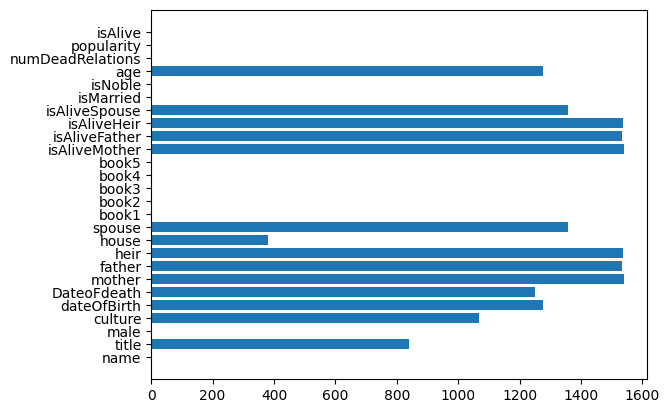

In [178]:
data_nan = data.isna().sum()
plt.barh(data_nan.index, data_nan.values);

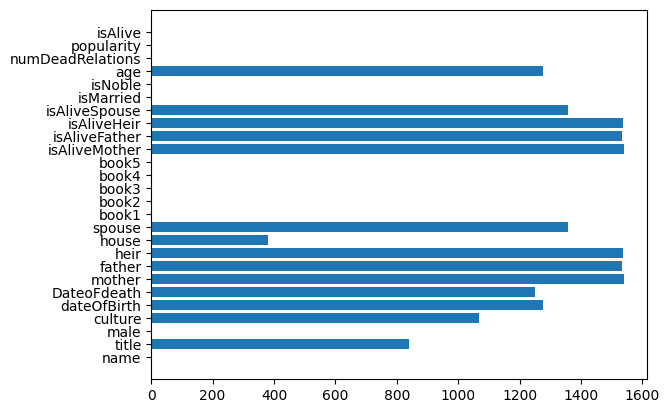

In [179]:
test_nan = test.isna().sum()
plt.barh(data_nan.index, data_nan.values);

In [180]:
for col in data.columns:
    print(f'Пропущенных значений в {col}: {data[col].isna().sum() / len(data[col]) * 100}%')

Пропущенных значений в name: 0.0%
Пропущенных значений в title: 53.94990366088632%
Пропущенных значений в male: 0.0%
Пропущенных значений в culture: 68.65767501605652%
Пропущенных значений в dateOfBirth: 82.08092485549133%
Пропущенных значений в DateoFdeath: 80.28259473346179%
Пропущенных значений в mother: 98.84393063583815%
Пропущенных значений в father: 98.58702633269107%
Пропущенных значений в heir: 98.65125240847784%
Пропущенных значений в house: 24.470134874759154%
Пропущенных значений в spouse: 87.15478484264611%
Пропущенных значений в book1: 0.0%
Пропущенных значений в book2: 0.0%
Пропущенных значений в book3: 0.0%
Пропущенных значений в book4: 0.0%
Пропущенных значений в book5: 0.0%
Пропущенных значений в isAliveMother: 98.84393063583815%
Пропущенных значений в isAliveFather: 98.58702633269107%
Пропущенных значений в isAliveHeir: 98.65125240847784%
Пропущенных значений в isAliveSpouse: 87.15478484264611%
Пропущенных значений в isMarried: 0.0%
Пропущенных значений в isNoble: 0.

In [181]:
for col in test.columns:
    print(f'Пропущенных значений в {col}: {test[col].isna().sum() / len(test[col]) * 100}%')

Пропущенных значений в name: 0.0%
Пропущенных значений в title: 43.18766066838046%
Пропущенных значений в male: 0.0%
Пропущенных значений в culture: 51.41388174807198%
Пропущенных значений в dateOfBirth: 60.411311053984576%
Пропущенных значений в DateoFdeath: 64.78149100257069%
Пропущенных значений в mother: 99.22879177377892%
Пропущенных значений в father: 98.97172236503856%
Пропущенных значений в heir: 99.48586118251927%
Пропущенных значений в house: 11.825192802056556%
Пропущенных значений в spouse: 80.46272493573264%
Пропущенных значений в book1: 0.0%
Пропущенных значений в book2: 0.0%
Пропущенных значений в book3: 0.0%
Пропущенных значений в book4: 0.0%
Пропущенных значений в book5: 0.0%
Пропущенных значений в isAliveMother: 99.22879177377892%
Пропущенных значений в isAliveFather: 98.97172236503856%
Пропущенных значений в isAliveHeir: 99.48586118251927%
Пропущенных значений в isAliveSpouse: 80.46272493573264%
Пропущенных значений в isMarried: 0.0%
Пропущенных значений в isNoble: 0

#### Удаление колонок, где слишком много Nan

In [182]:
data_cols = data.columns[data_nan > len(data) * 0.9]
test_cols = test.columns[test_nan > len(test) * 0.9]

In [183]:
data_cols.shape, test_cols.shape

((6,), (6,))

In [184]:
data.drop(data_cols, axis=1, inplace=True)
test.drop(test_cols, axis=1, inplace=True)

In [185]:
data.shape, test.shape

((1557, 20), (389, 19))

#### Обработка остальных колонок с Nan

In [186]:
data.isna().sum()

,0
name,0
title,840
male,0
culture,1069
dateOfBirth,1278
DateoFdeath,1250
house,381
spouse,1357
book1,0
book2,0


In [187]:
test.isna().sum()

,0
name,0
title,168
male,0
culture,200
dateOfBirth,235
DateoFdeath,252
house,46
spouse,313
book1,0
book2,0


In [188]:
data

,name,title,male,culture,dateOfBirth,DateoFdeath,house,spouse,book1,book2,book3,book4,book5,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,House Frey,Perra Royce,1,1,1,1,1,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,House Swyft,NaN,0,0,0,1,0,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,105.0,House Arryn,Viserys I Targaryen,0,0,0,0,0,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,House Santagar,Eldon Estermont,0,0,0,1,0,1.0,1,1,29.0,0,0.043478,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,Archmaester,1,NaN,NaN,NaN,NaN,NaN,1,0,1,1,0,NaN,0,1,NaN,0,0.160535,1
1554,Masha Heddle,NaN,0,NaN,NaN,298.0,NaN,NaN,1,1,0,0,0,NaN,0,0,NaN,0,0.040134,0
1555,Matthos Seaworth,NaN,1,NaN,NaN,299.0,House Seaworth,NaN,0,1,1,1,1,NaN,0,0,NaN,0,0.076923,0


In [189]:
date_of_death = data.DateoFdeath.dropna()
date_of_death_test = test.DateoFdeath.dropna()

In [190]:
def detect_outliers(data, method: str = '3sigma', **kwargs) -> pd.DataFrame:
  res_df = pd.DataFrame()
  for feature in data:
    mu, sigma = data[feature].mean(), data[feature].std()
    d = data[abs(data[feature]) > mu + 3 * sigma]
    res_df = pd.concat((res_df, d)).drop_duplicates(keep=False)
  return res_df.sort_index()

In [191]:
detect_outliers(pd.DataFrame(date_of_death))

,DateoFdeath
S.No,
1485,298299.0


На тренировочном сете оба метода нашли только 1 выброс

In [192]:
detect_outliers(pd.DataFrame(date_of_death_test))

,DateoFdeath
S.No,


В тестовом сете вообще нет выбросов

In [193]:
outlier = detect_outliers(pd.DataFrame(date_of_death))

Посмотрим зависимость таргета с датой смерти

In [194]:
data[['DateoFdeath', 'isAlive']]

,DateoFdeath,isAlive
S.No,,
1,NaN,0
2,NaN,1
3,NaN,1
4,105.0,0
5,NaN,1
...,...,...
1553,NaN,1
1554,298.0,0
1555,299.0,0


In [195]:
data.DateoFdeath.isna().sum(), data.isAlive.sum()

(1250, 1212)

Следовательно, почти все значения nan означают, что персонаж не умер. Получается, что реальных пустых значений всего 38. Их заполняем нулями вместе с информативными данными

In [196]:
data.DateoFdeath.fillna(0, inplace=True)

На тесте практически то же ссамое

In [197]:
test.DateoFdeath.isna().sum(), data.isAlive.sum()

(252, 1212)

In [198]:
test.DateoFdeath.fillna(0, inplace=True)

### Работа с колонкой house. Заполнение значениями из name

In [199]:
def f(x):
  return x.split()[-1]

In [200]:
house_names = data.name.apply(lambda x: f(x)).to_list()
house_names_test = test.name.apply(lambda x: f(x)).to_list()

In [201]:
houses = [f'House {name}' if pd.isna(house) else house for name, house in zip(data.name.to_list(), data.house.to_list())]
houses_test = [f'House {name}' if pd.isna(house) else house for name, house in zip(test.name.to_list(), test.house.to_list())]

In [202]:
data.house = houses
test.house = houses_test

In [203]:
data.house.isna().sum(), test.house.isna().sum()  # заполнили все nan домами

(0, 0)

In [204]:
data.house.shape, test.house.shape

((1557,), (389,))

In [205]:
data.house.value_counts().sort_values(ascending=False)

,count
house,
House Frey,89
Night's Watch,88
House Stark,56
House Targaryen,40
House Lannister,36
...,...
House Woolfield,1
House Ordello,1
House Fossoway,1


In [206]:
small_group = data.house.value_counts().loc[data.house.value_counts() == 1].index.to_list()
small_group_test = test.house.value_counts().loc[test.house.value_counts() == 1].index.to_list()

In [207]:
data.house.replace(small_group, 'small_house_group', inplace=True)
test.house.replace(small_group_test, 'small_house_group', inplace=True)

In [208]:
average_group = data.house.value_counts().loc[data.house.value_counts() < 8].index.to_list()
average_group_test = test.house.value_counts().loc[test.house.value_counts() < 8].index.to_list()

In [209]:
data.house.replace(average_group, 'average_house_group', inplace=True)
test.house.replace(average_group_test, 'average_house_group', inplace=True)

In [210]:
big_group = data.house.value_counts().loc[data.house.value_counts() < 100].index.to_list()
big_group_test = test.house.value_counts().loc[test.house.value_counts() < 100].index.to_list()

In [211]:
data.house.replace(big_group, 'big_house_group', inplace=True)
test.house.replace(big_group_test, 'big_house_group', inplace=True)

In [212]:
data.house.value_counts()

,count
house,
big_house_group,539
small_house_group,528
average_house_group,490


In [213]:
test.house.value_counts()

,count
house,
average_house_group,150
small_house_group,125
big_house_group,114


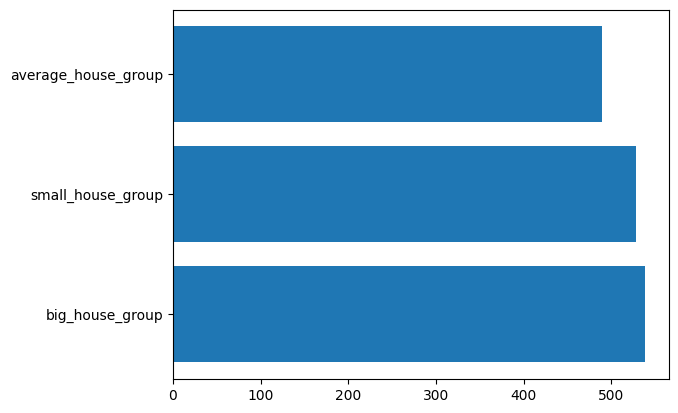

In [214]:
plt.barh(data.house.value_counts().index, data.house.value_counts().values);

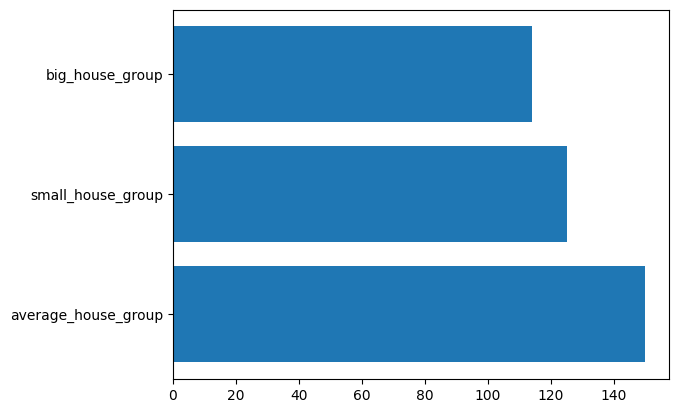

In [215]:
plt.barh(test.house.value_counts().index, test.house.value_counts().values);

### Работа с признаком title

In [216]:
data.title.value_counts()

,count
title,
Ser,306
Maester,29
Archmaester,21
Lord,19
Septon,16
...,...
Sweetport Sound,1
Lord of Greyshield,1
Felwood,1


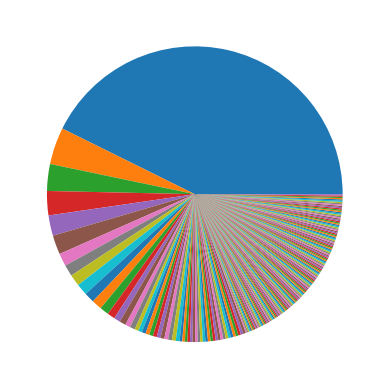

In [217]:
plt.pie(data.title.value_counts());

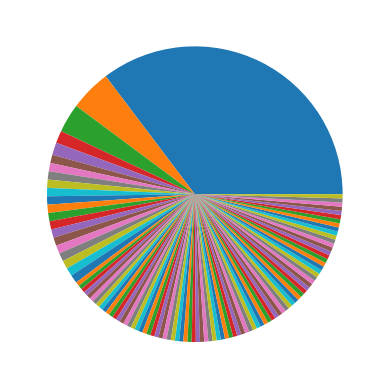

In [218]:
plt.pie(test.title.value_counts());

In [219]:
data.title.isna().sum(), test.title.isna().sum()

(840, 168)

In [220]:
data.title.shape, test.title.shape

((1557,), (389,))

#### Заполняю половину nan модой, половину отношу к другому большому кластеру титлов

In [221]:
title_nan = data.title.loc[data.title.isna()]
title_nan_test = test.title.loc[test.title.isna()]

In [241]:
title_nan_test

,title
S.No,
1558,nan_group
1559,nan_group
1560,nan_group
1562,nan_group
1563,nan_group
...,...
1941,nan_group
1942,nan_group
1943,nan_group


In [242]:
title_nan_sample = title_nan.sample(440)

In [243]:
title_nan[title_nan_sample.index] = data.title.mode().values[0]

In [244]:
title_nan[title_nan.isna()] = 'nan_group'
title_nan_test[title_nan_test.isna()] = 'nan_group'

In [245]:
title_nan

,title
S.No,
1,nan_group
6,notSer
8,notSer
11,notSer
12,notSer
...,...
1551,notSer
1554,nan_group
1555,notSer


In [246]:
title_nan_test

,title
S.No,
1558,nan_group
1559,nan_group
1560,nan_group
1562,nan_group
1563,nan_group
...,...
1941,nan_group
1942,nan_group
1943,nan_group


In [247]:
data.title[data.title.isna()] = title_nan
test.title[test.title.isna()] = title_nan_test

<ipython-input-247-d6d046447043>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.title[data.title.isna()] = title_nan
<ipython-input-247-d6d046447043>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.title[test.title.isna()] = title_nan_test


In [248]:
data.title.isna().sum(), test.title.isna().sum()

(0, 0)

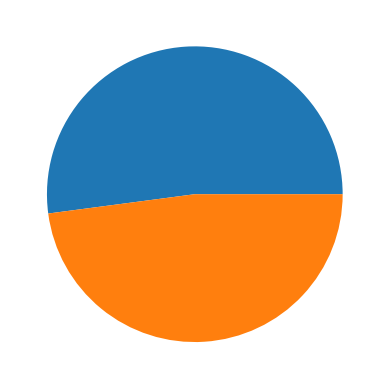

In [249]:
plt.pie(data.title.value_counts());

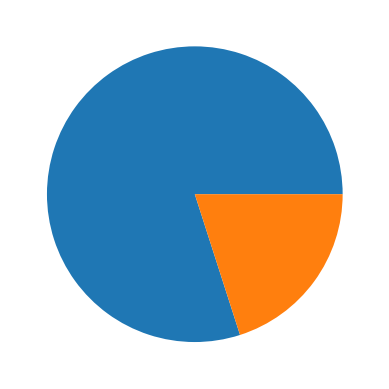

In [250]:
plt.pie(test.title.value_counts());

In [251]:
data.title.value_counts()

,count
title,
notSer,811
Ser,746


In [252]:
group_of_titles = data.title[data.title != 'Ser'].values
group_of_titles_test = test.title[test.title != 'Ser'].values

In [253]:
data.title.replace(group_of_titles, 'notSer', inplace=True)
test.title.replace(group_of_titles_test, 'notSer', inplace=True)

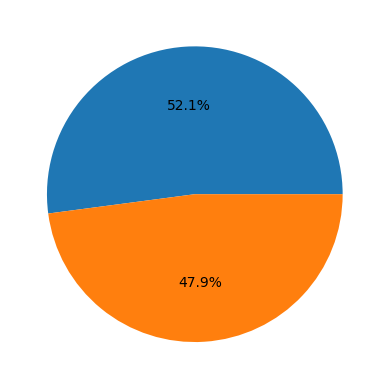

In [254]:
plt.pie(data.title.value_counts(), autopct='%1.1f%%');  # новое распределение тайтлов

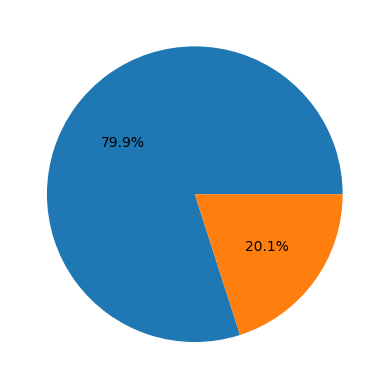

In [255]:
plt.pie(test.title.value_counts(), autopct='%1.1f%%');

In [256]:
data

,name,title,male,culture,dateOfBirth,DateoFdeath,house,spouse,book1,book2,book3,book4,book5,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,notSer,1,NaN,NaN,0.0,small_house_group,NaN,0,0,0,0,0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,notSer,1,Rivermen,208.0,0.0,big_house_group,Perra Royce,1,1,1,1,1,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,0.0,average_house_group,NaN,0,0,0,1,0,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,notSer,0,NaN,82.0,105.0,big_house_group,Viserys I Targaryen,0,0,0,0,0,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,notSer,0,Dornish,276.0,0.0,average_house_group,Eldon Estermont,0,0,0,1,0,1.0,1,1,29.0,0,0.043478,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,notSer,1,NaN,NaN,0.0,small_house_group,NaN,1,0,1,1,0,NaN,0,1,NaN,0,0.160535,1
1554,Masha Heddle,notSer,0,NaN,NaN,298.0,small_house_group,NaN,1,1,0,0,0,NaN,0,0,NaN,0,0.040134,0
1555,Matthos Seaworth,notSer,1,NaN,NaN,299.0,average_house_group,NaN,0,1,1,1,1,NaN,0,0,NaN,0,0.076923,0


In [238]:
test

,name,title,male,culture,dateOfBirth,DateoFdeath,house,spouse,book1,book2,book3,book4,book5,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity
S.No,,,,,,,,,,,,,,,,,,,
1558,Melissa Blackwood,notSer,0,NaN,156.0,0.0,average_house_group,NaN,0,0,0,0,1,NaN,0,0,100.0,0,0.050167
1559,Melisandre,notSer,0,Asshai,NaN,0.0,average_house_group,NaN,0,1,1,1,1,NaN,0,0,NaN,0,0.745819
1560,Merrit,notSer,0,NaN,NaN,0.0,average_house_group,NaN,0,0,1,1,0,NaN,0,0,NaN,0,0.010033
1561,Meryn Trant,Ser,1,NaN,NaN,0.0,small_house_group,NaN,1,1,1,1,1,NaN,0,1,NaN,0,0.220736
1562,Merrett Frey,notSer,1,Riverlands,262.0,300.0,big_house_group,Mariya Darry,1,1,1,1,1,1.0,1,0,38.0,0,0.434783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,Luwin,notSer,1,Westeros,NaN,299.0,big_house_group,NaN,1,1,1,1,1,NaN,0,0,NaN,0,0.351171
1943,Reek,notSer,1,NaN,NaN,299.0,average_house_group,NaN,0,1,0,1,1,NaN,0,0,NaN,0,0.096990
1944,Symeon Star-Eyes,notSer,1,NaN,NaN,0.0,small_house_group,NaN,1,1,1,1,1,NaN,0,0,NaN,0,0.030100


**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [257]:
for col in data:
    print(f'Количество уникальных значений в {col}: {data[col].nunique()}')

Количество уникальных значений в name: 1557
Количество уникальных значений в title: 2
Количество уникальных значений в male: 2
Количество уникальных значений в culture: 51
Количество уникальных значений в dateOfBirth: 105
Количество уникальных значений в DateoFdeath: 61
Количество уникальных значений в house: 3
Количество уникальных значений в spouse: 186
Количество уникальных значений в book1: 2
Количество уникальных значений в book2: 2
Количество уникальных значений в book3: 2
Количество уникальных значений в book4: 2
Количество уникальных значений в book5: 2
Количество уникальных значений в isAliveSpouse: 2
Количество уникальных значений в isMarried: 2
Количество уникальных значений в isNoble: 2
Количество уникальных значений в age: 72
Количество уникальных значений в numDeadRelations: 14
Количество уникальных значений в popularity: 117
Количество уникальных значений в isAlive: 2


In [258]:
for col in test:
    print(f'Количество уникальных значений в {col}: {test[col].nunique()}')

Количество уникальных значений в name: 389
Количество уникальных значений в title: 2
Количество уникальных значений в male: 2
Количество уникальных значений в culture: 48
Количество уникальных значений в dateOfBirth: 85
Количество уникальных значений в DateoFdeath: 26
Количество уникальных значений в house: 3
Количество уникальных значений в spouse: 75
Количество уникальных значений в book1: 2
Количество уникальных значений в book2: 2
Количество уникальных значений в book3: 2
Количество уникальных значений в book4: 2
Количество уникальных значений в book5: 2
Количество уникальных значений в isAliveSpouse: 2
Количество уникальных значений в isMarried: 2
Количество уникальных значений в isNoble: 2
Количество уникальных значений в age: 64
Количество уникальных значений в numDeadRelations: 13
Количество уникальных значений в popularity: 135


### Работа с признаком popularity

In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1557 non-null   object 
 1   title             1557 non-null   object 
 2   male              1557 non-null   int64  
 3   culture           488 non-null    object 
 4   dateOfBirth       279 non-null    float64
 5   DateoFdeath       1557 non-null   float64
 6   house             1557 non-null   object 
 7   spouse            200 non-null    object 
 8   book1             1557 non-null   int64  
 9   book2             1557 non-null   int64  
 10  book3             1557 non-null   int64  
 11  book4             1557 non-null   int64  
 12  book5             1557 non-null   int64  
 13  isAliveSpouse     200 non-null    float64
 14  isMarried         1557 non-null   int64  
 15  isNoble           1557 non-null   int64  
 16  age               279 non-null    float64
 17  

In [89]:
is_popular = [0 if i < 0.5 else 1 for i in data.popularity]
data['is_popular'] = is_popular

In [90]:
is_popular_test = [0 if i < 0.5 else 1 for i in test.popularity]
test['is_popular'] = is_popular_test

### Работа с признаком boolDeadRelations

In [91]:
boolDeadRelations = [1 if i > 0 else 0 for i in data['numDeadRelations']]
data['boolDeadRelations'] = boolDeadRelations
data.drop('numDeadRelations', axis=1, inplace=True)

In [92]:
boolDeadRelations_test = [1 if i > 0 else 0 for i in test['numDeadRelations']]
test['boolDeadRelations'] = boolDeadRelations_test
test.drop('numDeadRelations', axis=1, inplace=True)

In [93]:
test.head()

,name,title,male,culture,dateOfBirth,DateoFdeath,house,spouse,book1,book2,book3,book4,book5,isAliveSpouse,isMarried,isNoble,age,popularity,is_popular,boolDeadRelations
S.No,,,,,,,,,,,,,,,,,,,,
1558,Melissa Blackwood,notSer,0,NaN,156.0,0.0,average_house_group,NaN,0,0,0,0,1,NaN,0,0,100.0,0.050167,0,0
1559,Melisandre,notSer,0,Asshai,NaN,0.0,average_house_group,NaN,0,1,1,1,1,NaN,0,0,NaN,0.745819,1,0
1560,Merrit,notSer,0,NaN,NaN,0.0,average_house_group,NaN,0,0,1,1,0,NaN,0,0,NaN,0.010033,0,0
1561,Meryn Trant,Ser,1,NaN,NaN,0.0,small_house_group,NaN,1,1,1,1,1,NaN,0,1,NaN,0.220736,0,0
1562,Merrett Frey,notSer,1,Riverlands,262.0,300.0,big_house_group,Mariya Darry,1,1,1,1,1,1.0,1,0,38.0,0.434783,0,0


### Работа с признаком culture

In [94]:
# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

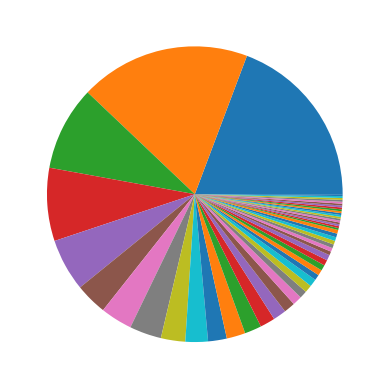

In [95]:
plt.pie(data.culture.value_counts());

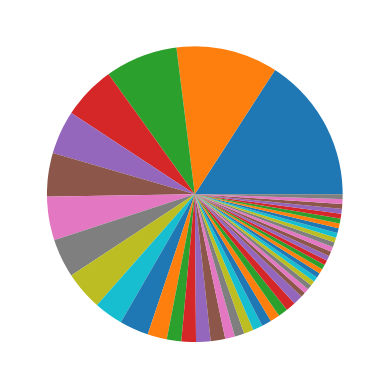

In [96]:
plt.pie(test.culture.value_counts());

In [97]:
for replace_to, replace_from in cult.items():
  data.culture.replace(replace_from, replace_to, inplace=True)

In [98]:
for replace_to, replace_from in cult.items():
  test.culture.replace(replace_from, replace_to, inplace=True)

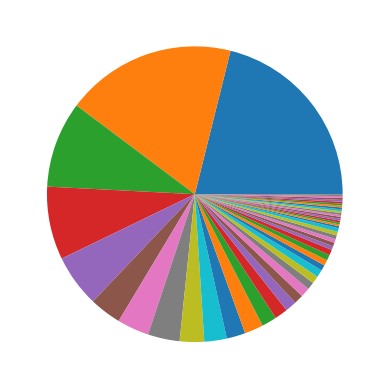

In [99]:
plt.pie(data.culture.value_counts());

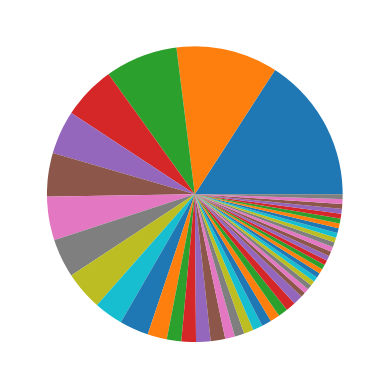

In [100]:
plt.pie(test.culture.value_counts());

In [101]:
data.culture.value_counts().head(10)

,count
culture,
Northmen,103
Ironborn,91
Free Folk,46
Braavosi,39
Valyrian,28
Dothraki,17
Ghiscari,17
Dornish,17
Reach,13


In [102]:
data.culture.isna().sum(), test.culture.isna().sum()

(1069, 200)

In [103]:
pd.crosstab(data.culture, data.house)

house,average_house_group,big_house_group,small_house_group
culture,,,
Andal,0,0,1
Andals,0,0,1
Astapori,0,0,4
Braavos,0,0,1
Braavosi,3,0,36
Crannogmen,2,0,0
Dorne,0,1,0
Dornish,11,1,5
Dornishmen,1,1,1


In [104]:
pd.crosstab(test.culture, test.house)

house,average_house_group,big_house_group,small_house_group
culture,,,
Asshai,1,0,1
Asshai'i,0,0,1
Astapor,0,0,1
Braavosi,0,1,2
Crannogmen,2,0,0
Dorne,0,0,1
Dornish,0,6,2
Dornishmen,1,8,2
Dothraki,0,2,4


In [105]:
cult_house = pd.crosstab(data.culture, data.house).max().values
cult_house_test = pd.crosstab(test.culture, test.house).max().values

In [106]:
cult_house, cult_house_test

(array([46, 47, 46]), array([15,  9,  8]))

In [107]:
house_cultures = pd.crosstab(data.culture, data.house).idxmax()
house_cultures

,0
house,
average_house_group,Northmen
big_house_group,Northmen
small_house_group,Free Folk


In [108]:
house_cultures_test = pd.crosstab(test.culture, test.house).idxmax()
house_cultures_test

,0
house,
average_house_group,Northmen
big_house_group,Northmen
small_house_group,Ghiscari


In [109]:
new_cult = pd.Series([house_cultures[x[1].house] if pd.isna(x[1].culture) else x[1].culture for x in data.iterrows()], index=data.index)
new_cult_test = pd.Series([house_cultures_test[x[1].house] if pd.isna(x[1].culture) else x[1].culture for x in test.iterrows()], index=test.index)

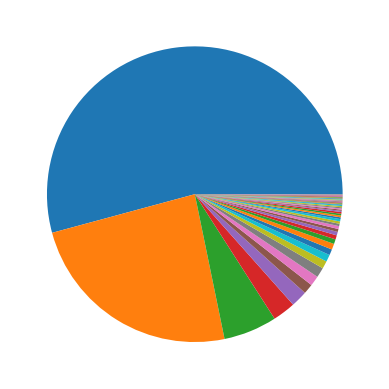

In [110]:
plt.pie(new_cult.value_counts());

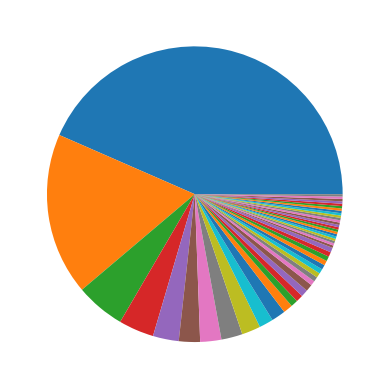

In [111]:
plt.pie(new_cult_test.value_counts());

In [112]:
cult_group = new_cult.value_counts().loc[new_cult.value_counts() < 100]
cult_group_test = new_cult_test.value_counts().loc[new_cult_test.value_counts() < 100]

In [113]:
new_cult.replace(cult_group.index, 'small_cult_group', inplace=True)
new_cult_test.replace(cult_group_test.index, 'small_cult_group', inplace=True)

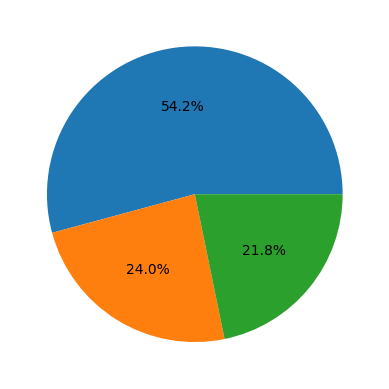

In [114]:
plt.pie(new_cult.value_counts(), autopct='%1.1f%%');

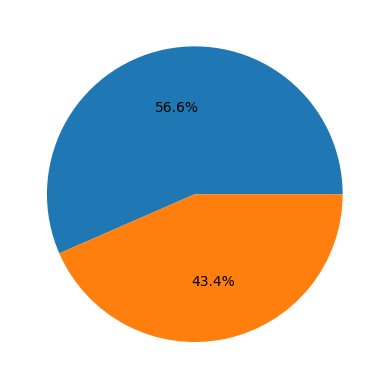

In [115]:
plt.pie(new_cult_test.value_counts(), autopct='%1.1f%%');

In [116]:
data.culture = new_cult
test.culture = new_cult_test

In [117]:
data.head(3)

,name,title,male,culture,dateOfBirth,DateoFdeath,house,spouse,book1,book2,...,book4,book5,isAliveSpouse,isMarried,isNoble,age,popularity,isAlive,is_popular,boolDeadRelations
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,Ser,1,Free Folk,NaN,0.0,small_house_group,NaN,0,0,...,0,0,NaN,0,0,NaN,0.605351,0,1,1
2,Walder Frey,notSer,1,small_cult_group,208.0,0.0,big_house_group,Perra Royce,1,1,...,1,1,1.0,1,1,97.0,0.896321,1,1,1
3,Addison Hill,Ser,1,Northmen,NaN,0.0,average_house_group,NaN,0,0,...,1,0,NaN,0,1,NaN,0.267559,1,0,0


In [118]:
test.head(3)

,name,title,male,culture,dateOfBirth,DateoFdeath,house,spouse,book1,book2,book3,book4,book5,isAliveSpouse,isMarried,isNoble,age,popularity,is_popular,boolDeadRelations
S.No,,,,,,,,,,,,,,,,,,,,
1558,Melissa Blackwood,notSer,0,Northmen,156.0,0.0,average_house_group,NaN,0,0,0,0,1,NaN,0,0,100.0,0.050167,0,0
1559,Melisandre,notSer,0,small_cult_group,NaN,0.0,average_house_group,NaN,0,1,1,1,1,NaN,0,0,NaN,0.745819,1,0
1560,Merrit,notSer,0,Northmen,NaN,0.0,average_house_group,NaN,0,0,1,1,0,NaN,0,0,NaN,0.010033,0,0


**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [119]:
data.drop(columns=['name', 'dateOfBirth', 'spouse', 'isAliveSpouse', 'age'], inplace = True)
data

,title,male,culture,DateoFdeath,house,book1,book2,book3,book4,book5,isMarried,isNoble,popularity,isAlive,is_popular,boolDeadRelations
S.No,,,,,,,,,,,,,,,,
1,Ser,1,Free Folk,0.0,small_house_group,0,0,0,0,0,0,0,0.605351,0,1,1
2,notSer,1,small_cult_group,0.0,big_house_group,1,1,1,1,1,1,1,0.896321,1,1,1
3,Ser,1,Northmen,0.0,average_house_group,0,0,0,1,0,0,1,0.267559,1,0,0
4,notSer,0,Northmen,105.0,big_house_group,0,0,0,0,0,1,1,0.183946,0,0,0
5,notSer,0,small_cult_group,0.0,average_house_group,0,0,0,1,0,1,1,0.043478,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,notSer,1,Free Folk,0.0,small_house_group,1,0,1,1,0,0,1,0.160535,1,0,0
1554,Ser,0,Free Folk,298.0,small_house_group,1,1,0,0,0,0,0,0.040134,0,0,0
1555,Ser,1,Northmen,299.0,average_house_group,0,1,1,1,1,0,0,0.076923,0,0,0


In [120]:
test.drop(columns=['name', 'dateOfBirth', 'spouse', 'isAliveSpouse', 'age'], inplace = True)
test

,title,male,culture,DateoFdeath,house,book1,book2,book3,book4,book5,isMarried,isNoble,popularity,is_popular,boolDeadRelations
S.No,,,,,,,,,,,,,,,
1558,notSer,0,Northmen,0.0,average_house_group,0,0,0,0,1,0,0,0.050167,0,0
1559,notSer,0,small_cult_group,0.0,average_house_group,0,1,1,1,1,0,0,0.745819,1,0
1560,notSer,0,Northmen,0.0,average_house_group,0,0,1,1,0,0,0,0.010033,0,0
1561,Ser,1,small_cult_group,0.0,small_house_group,1,1,1,1,1,0,1,0.220736,0,0
1562,notSer,1,small_cult_group,300.0,big_house_group,1,1,1,1,1,1,0,0.434783,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,notSer,1,small_cult_group,299.0,big_house_group,1,1,1,1,1,0,0,0.351171,0,0
1943,notSer,1,Northmen,299.0,average_house_group,0,1,0,1,1,0,0,0.096990,0,0
1944,notSer,1,small_cult_group,0.0,small_house_group,1,1,1,1,1,0,0,0.030100,0,0


**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

In [121]:
data.isAlive.dtype  # количественная

dtype('int64')

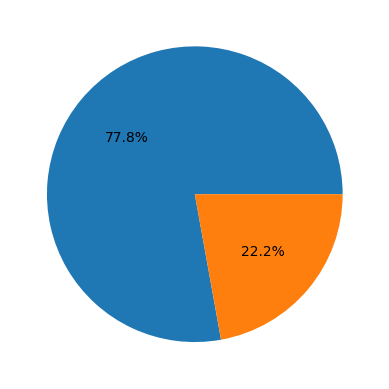

In [122]:
plt.pie(data.isAlive.value_counts(), autopct='%1.1f%%');

Датасет несбалансирован по классам

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [123]:
data

,title,male,culture,DateoFdeath,house,book1,book2,book3,book4,book5,isMarried,isNoble,popularity,isAlive,is_popular,boolDeadRelations
S.No,,,,,,,,,,,,,,,,
1,Ser,1,Free Folk,0.0,small_house_group,0,0,0,0,0,0,0,0.605351,0,1,1
2,notSer,1,small_cult_group,0.0,big_house_group,1,1,1,1,1,1,1,0.896321,1,1,1
3,Ser,1,Northmen,0.0,average_house_group,0,0,0,1,0,0,1,0.267559,1,0,0
4,notSer,0,Northmen,105.0,big_house_group,0,0,0,0,0,1,1,0.183946,0,0,0
5,notSer,0,small_cult_group,0.0,average_house_group,0,0,0,1,0,1,1,0.043478,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,notSer,1,Free Folk,0.0,small_house_group,1,0,1,1,0,0,1,0.160535,1,0,0
1554,Ser,0,Free Folk,298.0,small_house_group,1,1,0,0,0,0,0,0.040134,0,0,0
1555,Ser,1,Northmen,299.0,average_house_group,0,1,1,1,1,0,0,0.076923,0,0,0


In [124]:
cat_features = data.select_dtypes(include=[object]).columns.to_list()  # категориальные признаки
cat_features

['title', 'culture', 'house']

In [125]:
cat_features_test = test.select_dtypes(include=[object]).columns.to_list()  # категориальные признаки
cat_features_test

['title', 'culture', 'house']

In [126]:
from sklearn.preprocessing import OneHotEncoder

Тренировочный датасет

In [132]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
one_hot_encoded = encoder.fit_transform(data[cat_features])
one_hot_encoded_test = encoder.transform(test[cat_features])

In [133]:
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(cat_features), index=data.index)

In [134]:
one_hot_df

,title_Ser,title_notSer,culture_Free Folk,culture_Northmen,culture_small_cult_group,house_average_house_group,house_big_house_group,house_small_house_group
S.No,,,,,,,,
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
5,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1553,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1554,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1555,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [136]:
one_hot_df_test = pd.DataFrame(one_hot_encoded_test, columns=encoder.get_feature_names_out(cat_features), index=test.index)
one_hot_df_test

,title_Ser,title_notSer,culture_Free Folk,culture_Northmen,culture_small_cult_group,house_average_house_group,house_big_house_group,house_small_house_group
S.No,,,,,,,,
1558,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1559,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1560,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1561,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1562,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
1942,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1943,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1944,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [137]:
df = pd.concat([data, one_hot_df], axis=1)
df.drop(cat_features, inplace=True, axis=1)

In [138]:
df_test = pd.concat([test, one_hot_df_test], axis=1)
df_test.drop(cat_features, inplace=True, axis=1)

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   male                       1557 non-null   int64  
 1   DateoFdeath                1557 non-null   float64
 2   book1                      1557 non-null   int64  
 3   book2                      1557 non-null   int64  
 4   book3                      1557 non-null   int64  
 5   book4                      1557 non-null   int64  
 6   book5                      1557 non-null   int64  
 7   isMarried                  1557 non-null   int64  
 8   isNoble                    1557 non-null   int64  
 9   popularity                 1557 non-null   float64
 10  isAlive                    1557 non-null   int64  
 11  is_popular                 1557 non-null   int64  
 12  boolDeadRelations          1557 non-null   int64  
 13  title_Ser                  1557 non-null   float64
 1

In [140]:
df

,male,DateoFdeath,book1,book2,book3,book4,book5,isMarried,isNoble,popularity,...,is_popular,boolDeadRelations,title_Ser,title_notSer,culture_Free Folk,culture_Northmen,culture_small_cult_group,house_average_house_group,house_big_house_group,house_small_house_group
S.No,,,,,,,,,,,,,,,,,,,,,
1,1,0.0,0,0,0,0,0,0,0,0.605351,...,1,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1,0.0,1,1,1,1,1,1,1,0.896321,...,1,1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,1,0.0,0,0,0,1,0,0,1,0.267559,...,0,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0,105.0,0,0,0,0,0,1,1,0.183946,...,0,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
5,0,0.0,0,0,0,1,0,1,1,0.043478,...,0,0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,1,0.0,1,0,1,1,0,0,1,0.160535,...,0,0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1554,0,298.0,1,1,0,0,0,0,0,0.040134,...,0,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1555,1,299.0,0,1,1,1,1,0,0,0.076923,...,0,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [141]:
df_test

,male,DateoFdeath,book1,book2,book3,book4,book5,isMarried,isNoble,popularity,is_popular,boolDeadRelations,title_Ser,title_notSer,culture_Free Folk,culture_Northmen,culture_small_cult_group,house_average_house_group,house_big_house_group,house_small_house_group
S.No,,,,,,,,,,,,,,,,,,,,
1558,0,0.0,0,0,0,0,1,0,0,0.050167,0,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1559,0,0.0,0,1,1,1,1,0,0,0.745819,1,0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1560,0,0.0,0,0,1,1,0,0,0,0.010033,0,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1561,1,0.0,1,1,1,1,1,0,1,0.220736,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1562,1,300.0,1,1,1,1,1,1,0,0.434783,0,0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,1,299.0,1,1,1,1,1,0,0,0.351171,0,0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1943,1,299.0,0,1,0,1,1,0,0,0.096990,0,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1944,1,0.0,1,1,1,1,1,0,0,0.030100,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


### Корреляция между признаками

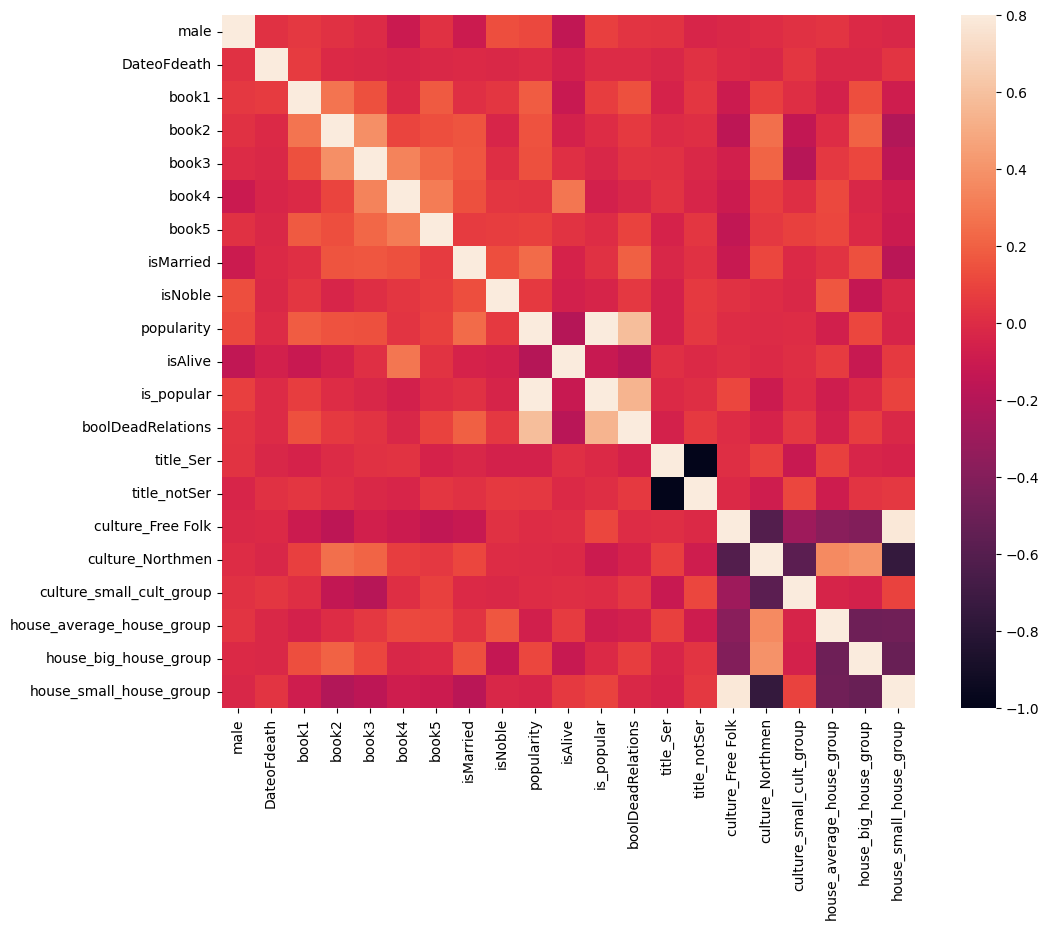

In [142]:
# без значений, потому что ввиду количества признаков, числа просто не видно. чем ближе к белому (черному) цвету - тем выше корреляция
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

Корреляция есть, что очевидно, между признаками is_popular и popularity, а также между значениями OHE в правом нижнем угллу. между значениями домов и культур

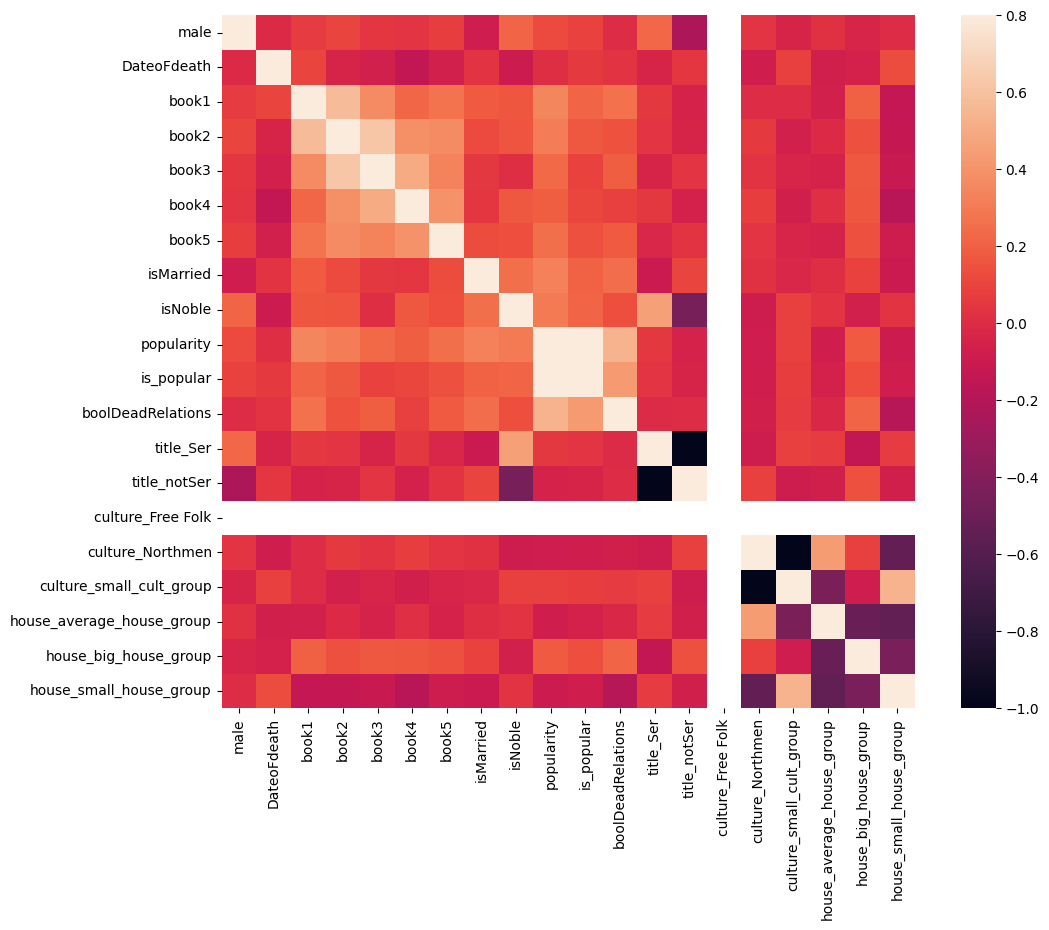

In [144]:
corrmat_test = df_test.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat_test, vmax=.8, square=True);

На тесте очень сильная корреляция признака culture_FreeFolk со всеми остальными признаками

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

### Кого больше в живых: мужчин или женщин

In [145]:
data_1 = df[df.male == 1]['isAlive'].value_counts()
data_2 = df[df.male == 0]['isAlive'].value_counts()

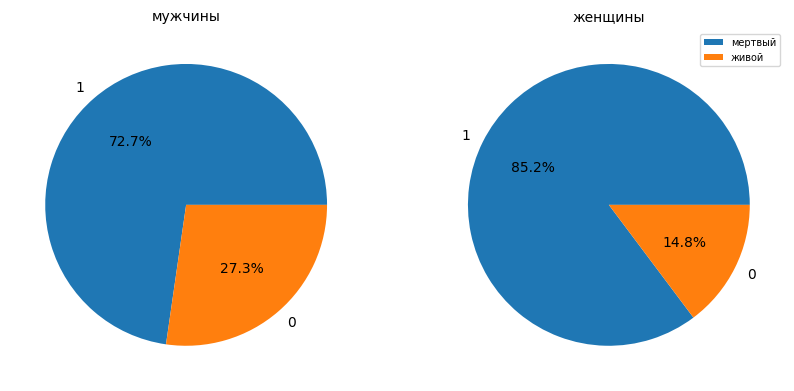

In [147]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8))

ax1.pie(data_1.values, labels=data_1.index, autopct='%1.1f%%', textprops={'fontsize': 10})
ax2.pie(data_2.values, labels=data_2.index, autopct='%1.1f%%', textprops={'fontsize': 10})

ax1.set_title('мужчины', fontsize=10)
ax2.set_title('женщины', fontsize=10)

plt.legend(['мертвый', 'живой'], fontsize=7);

### Зависит ли целевая переменная от появления героя в книгах

In [150]:
data_1 = df[df.book1 == 1]['isAlive'].value_counts()
data_2 = df[df.book2 == 0]['isAlive'].value_counts()
data_3 = df[df.book3 == 1]['isAlive'].value_counts()
data_4 = df[df.book4 == 0]['isAlive'].value_counts()

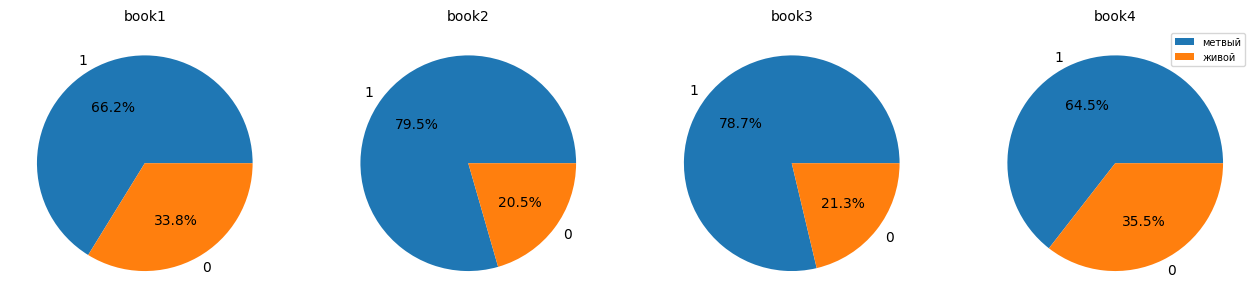

In [151]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16, 8))

ax1.pie(data_1.values, labels=data_1.index, autopct='%1.1f%%', textprops={'fontsize': 10})
ax2.pie(data_2.values, labels=data_2.index, autopct='%1.1f%%', textprops={'fontsize': 10})
ax3.pie(data_3.values, labels=data_3.index, autopct='%1.1f%%', textprops={'fontsize': 10})
ax4.pie(data_4.values, labels=data_4.index, autopct='%1.1f%%', textprops={'fontsize': 10})

ax1.set_title('book1', fontsize=10)
ax2.set_title('book2', fontsize=10)
ax3.set_title('book3', fontsize=10)
ax4.set_title('book4', fontsize=10)

plt.legend(['метвый', 'живой'], fontsize=7);

### Влияет ли популярность

In [152]:
data_1 = df[df.is_popular == 1]['isAlive'].value_counts()
data_2 = df[df.is_popular == 0]['isAlive'].value_counts()

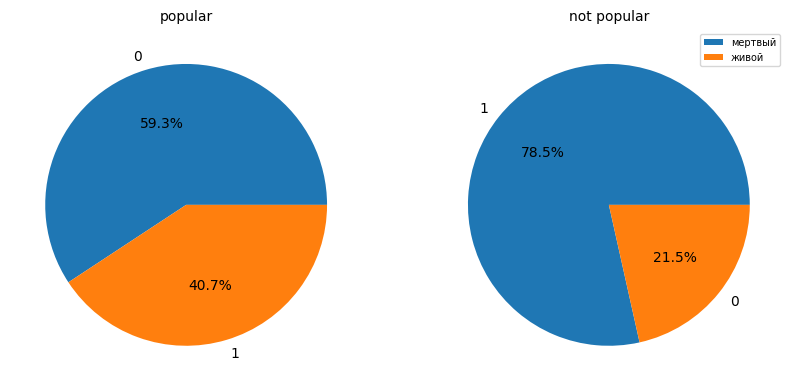

In [153]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8))

ax1.pie(data_1.values, labels=data_1.index, autopct='%1.1f%%', textprops={'fontsize': 10})
ax2.pie(data_2.values, labels=data_2.index, autopct='%1.1f%%', textprops={'fontsize': 10})

ax1.set_title('popular', fontsize=10)
ax2.set_title('not popular', fontsize=10)

plt.legend(['мертвый', 'живой'], fontsize=7);

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [154]:
X = df.drop('isAlive', axis=1)
y = df.isAlive

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [155]:
from sklearn.model_selection import train_test_split

In [156]:
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [157]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [158]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [159]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

### Обучение всех моделей сразу с подбором параметров

In [160]:
models = {
    LogisticRegression(n_jobs=-1): {
        'penalty': ['l1', 'l2'],
        'C': [0.1, 1, 10],
        'solver': ['liblinear', 'saga'],
        'max_iter': [2000, 1500]
    },
    AdaBoostClassifier(): {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1]
    },
    RandomForestClassifier(n_jobs=-1): {
        'n_estimators': [200, 150, 300],
        'max_depth': [10, 20, 5],
        'min_samples_split': [2, 5, 3],
        'min_samples_leaf': [1, 2, 3]
    },
    GaussianProcessClassifier(n_jobs=-1): {
        'kernel': [None],  # По умолчанию Radial Basis Function (RBF)
        'n_restarts_optimizer': [0, 1, 5]
    },
    GaussianNB(): {},  # Нет гиперпараметров для настройки
    KNeighborsClassifier(n_jobs=-1): {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree']
    },
    SVC(): {
        'C': [0.1, 1, 0.01],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    DecisionTreeClassifier(): {
        'max_depth': [None, 10, 5],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2, 3],
        'criterion': ['gini', 'entropy']
    }
}

In [161]:
result_models_metrics = {}

for model, params in models.items():
  print(f'===={model.__class__.__name__}====')
  model = GridSearchCV(model, params, n_jobs=-1)
  model.fit(x_train, y_train)
  y_pred = model.predict(x_val)
  result_models_metrics[model.best_estimator_] = accuracy_score(y_pred, y_val)

====LogisticRegression====


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(


====AdaBoostClassifier====


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


====RandomForestClassifier====


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


====GaussianProcessClassifier====
====GaussianNB====
====KNeighborsClassifier====
====SVC====
====DecisionTreeClassifier====


## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy. (была импортирована выше)

In [162]:
# оценка моделей на промежуточных валидационных данных

for res_model, res_metric in result_models_metrics.items():
  print(f'{res_model.__class__.__name__}: {res_metric}')

LogisticRegression: 0.9839743589743589
AdaBoostClassifier: 0.9839743589743589
RandomForestClassifier: 0.9839743589743589
GaussianProcessClassifier: 0.9807692307692307
GaussianNB: 0.9743589743589743
KNeighborsClassifier: 0.9839743589743589
SVC: 0.9839743589743589
DecisionTreeClassifier: 0.9807692307692307


Выберите лучшую модель.

Почти все модели обучились с одинаковой точностью. Я выберу случайный лес. Поэтому берем его для далнейшего предсказания

In [163]:
model = list(result_models_metrics.keys())[2]

In [164]:
model

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200, n_jobs=-1)

In [165]:
predict = model.predict(df_test)

In [166]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 11.3MB/s]


In [167]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [168]:
submission

,isAlive
S.No,
1558,0
1559,0
1560,0
1561,0
1562,0
...,...
1942,0
1943,0
1944,0


In [169]:
submission.isAlive = predict

In [170]:
submission

,isAlive
S.No,
1558,1
1559,1
1560,1
1561,1
1562,0
...,...
1942,0
1943,0
1944,1


In [171]:
submission.to_csv('submission.csv', index=False)